In [21]:
# Oppgave 1
import numpy_financial as npf
import numpy as np
import matplotlib.pyplot as plt

# Definer investeringskostnadene og kontantstrømmer
investeringskostnad = 6600000 + 250000  # Investeringskostnad pluss frakt og monteringskostnad
omløpsmidler = 350000
innbetalingsoverskudd = 1800000
utrangeringsverdi = 600000

In [22]:
# Initielle kontantstrøm (år 0)
kontantstrom = [-investeringskostnad - omløpsmidler]

# Kontantstrømmer for år 1 til 5 med append
for i in range(1, 6):
    kontantstrom.append(innbetalingsoverskudd)

# Legger til innbetalingsoverskudd utragerinsverdi + omløpsmidler og får ut kontantstrømoppstillingen
kontantstrom.append(innbetalingsoverskudd + utrangeringsverdi + omløpsmidler)

# Skriv ut kontantstrømmene
print(kontantstrom)

[-7200000, 1800000, 1800000, 1800000, 1800000, 1800000, 2750000]


In [23]:
# Beregn NPV og IRR
diskonteringsrente = 0.14
npv = npf.npv(diskonteringsrente, kontantstrom)
irr = npf.irr(kontantstrom)

print(f"NPV: {npv}")
print(f"IRR: {irr}")

NPV: 232408.75007635984
IRR: 0.1511146207633769


In [24]:
# Sammenlign NPV for maskininvesteringen med det alternative prosjektet
if npv > 0:
    anbefaling = "Maskininvesteringen er å foretrekke siden nåverdien er positiv."
else:
    anbefaling = "Det alternative prosjektet er å foretrekke siden maskininvesteringen har en negativ nåverdi."

print(f"NPV for maskininvesteringen: {npv}")
print(anbefaling)

NPV for maskininvesteringen: 232408.75007635984
Maskininvesteringen er å foretrekke siden nåverdien er positiv.


In [25]:
avskrivningssats = 0.20
# Lineær avskrivning per år
lineaer_avskrivning_per_år = (investeringskostnad - utrangeringsverdi) / 6

# Beregning av saldoavskrivning
saldo_avskrivning = []
bokfort_verdi = investeringskostnad

for i in range(6 - 1):  # Vi avskriver ikke i det siste året for å respektere utrangeringsverdien
    avskrivning_dette_aaret = bokfort_verdi * avskrivningssats
    saldo_avskrivning.append(avskrivning_dette_aaret)
    bokfort_verdi -= avskrivning_dette_aaret

# Siste års avskrivning justeres for å ende opp med utrangeringsverdien
saldo_avskrivning.append(bokfort_verdi - utrangeringsverdi)

print(lineaer_avskrivning_per_år)
print(saldo_avskrivning)

1041666.6666666666
[1370000.0, 1096000.0, 876800.0, 701440.0, 561152.0, 1644608.0]


In [26]:
# Oppgave E
investeringskostnad

6850000

In [27]:
# Oppgave F, samme svar
investeringskostnad

6850000

In [28]:
# Oppgave G
# UB-verdi for lineær avskrivning
ub_verdi_linear = investeringskostnad - (lineaer_avskrivning_per_år * 6)

# UB-verdi for saldometoden
ub_verdi_saldo = investeringskostnad - sum(saldo_avskrivning)

ub_verdi_linear, ub_verdi_saldo


(600000.0, 600000.0)

In [29]:
# Oppgave 2
# Definere variabler
salgsinntekter = {"A": 825000, "B": 675000, "C": 450000}
dekningsgrader = {"A": 0.40, "B": 0.35, "C": 0.50}
faste_kostnader = 540000

In [30]:
# Oppgave a, noe scuffed
# Beregning av dekningsbidrag for hvert produkt
dekningsbidrag = {i: salgsinntekter[i] * dekningsgrader[i] for i in salgsinntekter}

# Totalt dekningsbidrag og resultat
totalt_dekningsbidrag = sum(dekningsbidrag.values())
resultat = totalt_dekningsbidrag - faste_kostnader

# Beregning av nullpunktomsetning
vektet_dekningsgrad = sum(dekningsbidrag[i] for i in dekningsbidrag) / sum(salgsinntekter.values())
nullpunktomsetning = faste_kostnader / vektet_dekningsgrad

dekningsbidrag, totalt_dekningsbidrag, resultat, nullpunktomsetning


({'A': 330000.0, 'B': 236249.99999999997, 'C': 225000.0},
 791250.0,
 251250.0,
 1330805.6872037915,
 619194.3127962085,
 31.753554502369667)

In [33]:
# Oppgave b
# Beregning av vektet dekningsgrad basert på produktsammensetning
vektet_dekningsgrad = sum([dekningsbidrag[i] for i in dekningsbidrag]) / sum(salgsinntekter.values())

# Beregning av nullpunktomsetning basert på vektet dekningsgrad
nullpunktomsetning_beregnet = faste_kostnader / vektet_dekningsgrad

# Beregning av sikkerhetsmargin i kroner og prosent
total_omsetning = sum(salgsinntekter.values())
sikkerhetsmargin_kroner_beregnet = total_omsetning - nullpunktomsetning_beregnet
sikkerhetsmargin_prosent_beregnet = (sikkerhetsmargin_kroner_beregnet / total_omsetning) * 100

nullpunktomsetning_beregnet, sikkerhetsmargin_kroner_beregnet, sikkerhetsmargin_prosent_beregnet


(1330805.6872037915, 619194.3127962085, 31.753554502369667)

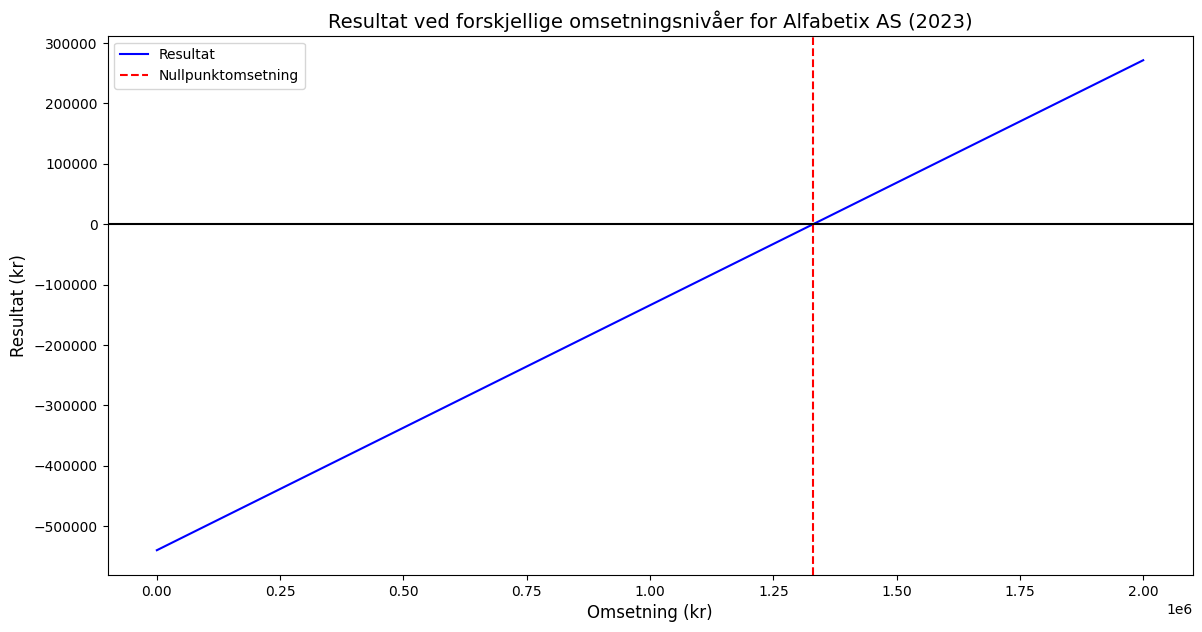

In [40]:
# Oppgave c

# Definerte data for omsetning og kostnader
total_omsetning = sum(salgsinntekter.values())
variable_kostnader = total_omsetning - totalt_dekningsbidrag
faste_kostnader = 540000

# Beregne totale kostnader ved ulike omsetningsnivåer
omsetningsnivaer = range(0, int(total_omsetning) + 100000, 100000)

# Beregner resultatet ved forskjellige omsetningsnivåer
resultat_ved_omsetning = [i - (faste_kostnader + variable_kostnader * (i / total_omsetning)) for i in omsetningsnivaer]

# Plotter resultatet mot omsetning
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(omsetningsnivaer, resultat_ved_omsetning, label='Resultat', color='blue')

# Markerer nullpunktomsetningen
ax.axvline(x=nullpunktomsetning_beregnet, color='red', linestyle='--', label='Nullpunktomsetning')
ax.axhline(y=0, color='black', linestyle='-')

# Setter titler og labels
ax.set_title('Resultat ved forskjellige omsetningsnivåer for Alfabetix AS (2023)', fontsize=14)
ax.set_xlabel('Omsetning (kr)', fontsize=12)
ax.set_ylabel('Resultat (kr)', fontsize=12)
ax.legend()
plt.show()

In [42]:
# Oppgave d
# Nye prognoser
salgsinntekter_prognose = {"A": 800000, "B": 525000, "C": 625000}

# Kjører samme kode på nytt med oppdaterte prognoser
dekningsbidrag_prognose = {i: salgsinntekter_prognose[i] * dekningsgrader[i] for i in salgsinntekter_prognose}

# Totalt dekningsbidrag og resultat basert på prognosen
totalt_dekningsbidrag_prognose = sum(dekningsbidrag_prognose.values())

# Beregning av nullpunktomsetningen basert på vektet dekningsgrad og prognosene
vektet_dekningsgrad_prognose = totalt_dekningsbidrag_prognose / sum(salgsinntekter_prognose.values())
nullpunktomsetning_prognose = faste_kostnader / vektet_dekningsgrad_prognose

# Beregning av sikkerhetsmargin i kroner og prosent basert på prognosene
total_omsetning_prognose = sum(salgsinntekter_prognose.values())
sikkerhetsmargin_kroner_prognose = total_omsetning_prognose - nullpunktomsetning_prognose
sikkerhetsmargin_prosent_prognose = (sikkerhetsmargin_kroner_prognose / total_omsetning_prognose) * 100

nullpunktomsetning_prognose, sikkerhetsmargin_kroner_prognose, sikkerhetsmargin_prosent_prognose

(1290045.9418070444, 659954.0581929556, 33.843797856049)

In [44]:
# Oppgave 3
# a)
totale_indirekte_kostnader = {
    "Materialavdeling": 200000,
    "Tilvirkningsavdeling 1": 1000000,
    "Tilvirkningsavdeling 2": 550000
}

kostnadsdrivere = {
    "Materialavdeling": 500000,
    "Tilvirkningsavdeling 1": 1000000,
    "Tilvirkningsavdeling 2": 2000
}

# Beregning av normalsatser
normalsatser = {i: totale_indirekte_kostnader[i] / kostnadsdrivere[i] for i in totale_indirekte_kostnader}

normalsatser


{'Materialavdeling': 0.4,
 'Tilvirkningsavdeling 1': 1.0,
 'Tilvirkningsavdeling 2': 275.0}

In [47]:
# Direkte kostnader for produkter A og B
direkte_kostnader_A = {'Materialer': 10000, 'Lønn avd. 1': 22000, 'Lønn avd. 2': 19000, 'Timer': 84}
direkte_kostnader_B = {'Materialer': 30000, 'Lønn avd. 1': 74000, 'Lønn avd. 2': 58000, 'Timer': 124}

# Registrerte indirekte kostnader for oktober
indirekte_kostnader = {
    'Materialavdeling': {'Variable': 5000, 'Faste': 13000},
    'Tilvirkningsavdeling 1': {'Variable': 22000, 'Faste': 65000},
    'Tilvirkningsavdeling 2': {'Variable': 5500, 'Faste': 40000},
    'Salgs- og adm. avdeling': {'Variable': 1200, 'Faste': 26000}
}

# Salgsinntekter for produktene
salgsinntekter_produkter = {'A': 200000, 'B': 330000}

# Beregning av bidragsmargin per produkt
bidragsmargin_A = salgsinntekter_produkter['A'] - sum(direkte_kostnader_A.values())
bidragsmargin_B = salgsinntekter_produkter['B'] - sum(direkte_kostnader_B.values())

# Beregning av driftsresultatet
totalt_bidragsmargin = bidragsmargin_A + bidragsmargin_B
totalt_faste_kostnader = sum([sum(i.values()) for i in indirekte_kostnader.values()])
driftsresultat = totalt_bidragsmargin - totalt_faste_kostnader

# Resultater
print(f"Bidragsmargin A: {bidragsmargin_A}") 
print(f"Bidragsmargin B: {bidragsmargin_B}") 
print(f"Total bidragsmargin: {totalt_bidragsmargin}" )
print(f"Totalt faste kostnader: {totalt_faste_kostnader}") 
print(f"Driftsresultat: {driftsresultat}")


Bidragsmargin A: 148916
Bidragsmargin B: 167876
Total bidragsmargin: 316792
Totalt faste kostnader: 177700
Driftsresultat: 139092


In [50]:
# Normalsatser fra tilvirkningsavdeling 2
normalsats_tilvirkningsavd_2 = normalsatser['Tilvirkningsavdeling 2']

# Beregning av budsjettert bidrag for tilvirkningsavdeling 2
budsjettert_bidrag_A = direkte_kostnader_A['Timer'] * normalsats_tilvirkningsavd_2
budsjettert_bidrag_B = direkte_kostnader_B['Timer'] * normalsats_tilvirkningsavd_2
totalt_budsjettert_bidrag = budsjettert_bidrag_A + budsjettert_bidrag_B

# Faktiske indirekte kostnader for tilvirkningsavdeling 2
faktiske_indirekte_kostnader = indirekte_kostnader['Tilvirkningsavdeling 2']['Variable'] + indirekte_kostnader['Tilvirkningsavdeling 2']['Faste']

# Beregning av faktisk bidrag for tilvirkningsavdeling 2
faktisk_bidrag_A = salgsinntekter_produkter['A'] - (direkte_kostnader_A['Lønn avd. 2'] + faktiske_indirekte_kostnader)
faktisk_bidrag_B = salgsinntekter_produkter['B'] - (direkte_kostnader_B['Lønn avd. 2'] + faktiske_indirekte_kostnader)
totalt_faktisk_bidrag = faktisk_bidrag_A + faktisk_bidrag_B

# Beregning av dekningsdifferansen
dekningsdifferanse = totalt_faktisk_bidrag - totalt_budsjettert_bidrag


print(f"Total budsjettert bidrag: {totalt_budsjettert_bidrag}" )
print(f"Totalt faktisk bidrag: {totalt_faktisk_bidrag}") 
print(f"Differanse: {dekningsdifferanse}")


Total budsjettert bidrag: 57200.0
Totalt faktisk bidrag: 362000
Differanse: 304800.0


In [51]:
from scipy.optimize import linprog

# Kostnadene og dekningsbidragene for "Trollet" og "Draugen"
kostnader_trollet = [300, 5]  # Tilvirkningsavdelingen og monteringsavdelingen
kostnader_draugen = [4, 35]
dekningsbidrag_trollet = 350
dekningsbidrag_draugen = 400

# Kapasiteter i avdelingene
kapasitet_tilvirkning = 2000
kapasitet_montering = 2500

# Lineær programmering for å maksimere dekningsbidraget
# Vi ønsker å maksimere 350x + 400y gitt begrensningene i kapasitetene
c = [-dekningsbidrag_trollet, -dekningsbidrag_draugen]  # Koeffisienter i målfunksjonen (negative fordi linprog utfører minimering)
A = [kostnader_trollet, kostnader_draugen]  # Koeffisienter for ulikhetene (ressursbruk per enhet)
b = [kapasitet_tilvirkning, kapasitet_montering]  # Kapasiteter for ulikhetene

# Grenser for antall enheter som kan produseres (vi antar ingen negativ produksjon)
x_bounds = (0, None)  # Ingen grense for hvor mange "Trollet" kan produseres
y_bounds = (0, None)  # Ingen grense for hvor mange "Draugen" kan produseres

# Utfør lineær programmering
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')

# Antall enheter som maksimerer dekningsbidraget
antall_trollet = result.x[0]
antall_draugen = result.x[1]

# Totalt dekningsbidrag ved optimal produksjon
totalt_dekningsbidrag = antall_trollet * dekningsbidrag_trollet + antall_draugen * dekningsbidrag_draugen

antall_trollet, antall_draugen, totalt_dekningsbidrag

(5.486641221374046, 70.80152671755727, 30240.93511450382)

In [55]:
from scipy.optimize import linprog

# Dekningsbidrag per enhet for «Trollet» og «Draugen»
db = [350, 400]  # Må være negativ fordi linprog gjør en minimisering som standard

# Koeffisientene i ulikhetene
A = [
    [3, 4],  # Tilvirkningsavdelingen
    [5, 3.5]  # Monteringsavdelingen
]

# Kapasitetsbegrensninger
b = [2000, 2500]

# Grenser for x og y
x_bounds = (0, None)  # x kan ikke være negativ og har ingen øvre grense
y_bounds = (0, None)  # y kan ikke være negativ og har ingen øvre grense

# Utføre lineær programmering
result = linprog(c=-1 * np.array(db), A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')

# Sjekk resultatet og beregn dekningsbidraget dersom løsningen er vellykket
if result.success:
    optimal_units = result.x
    optimal_db = -1 * result.fun  # Dekningsbidraget er negativt i resultatet fordi vi multipliserte med -1
else:
    optimal_units = None
    optimal_db = None

optimal_units, optimal_db



(array([315.78947368, 263.15789474]), 215789.47368421053)

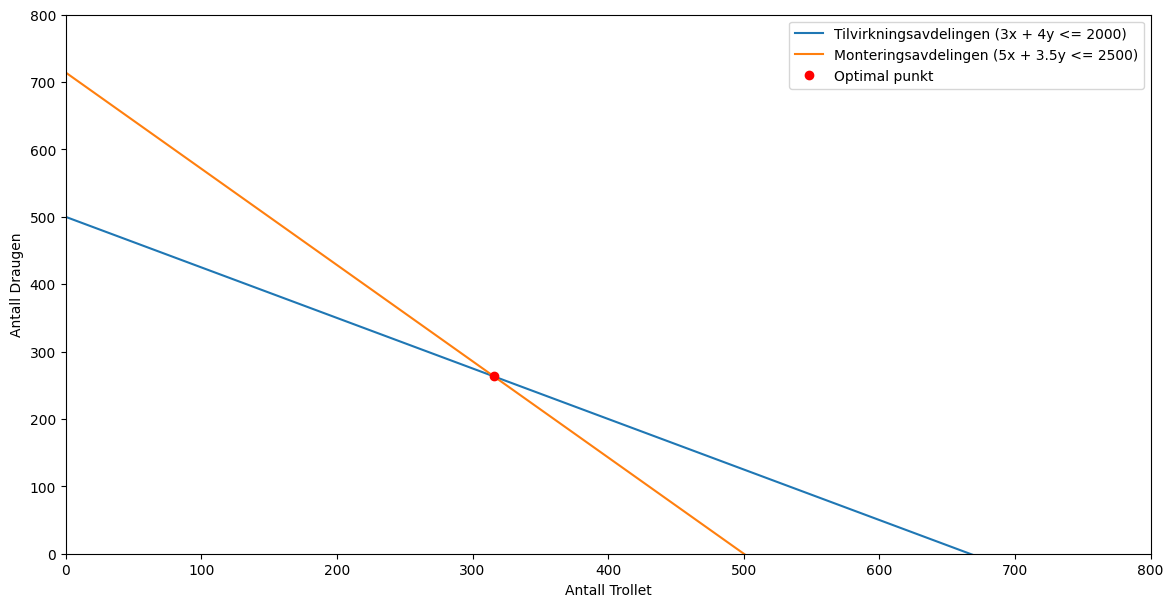

In [59]:
import matplotlib.pyplot as plt
# Definerer området for x og y
x_values = np.linspace(0, 800, 400)  # x-verdier fra 0 til 800
y_values = np.linspace(0, 800, 400)  # y-verdier fra 0 til 800

# Beregner grensene for y gitt x-verdier basert på kapasitetsbegrensninger
y_tilvirkning = (2000 - 3*x_values) / 4
y_montering = (2500 - 5*x_values) / 3.5


fig, ax = plt.subplots(figsize=(14, 7))
# Plotter begrensningene
ax.plot(x_values, y_tilvirkning, label='Tilvirkningsavdelingen (3x + 4y <= 2000)')
ax.plot(x_values, y_montering, label='Monteringsavdelingen (5x + 3.5y <= 2500)')

# Markerer løsningen
ax.plot(optimal_units[0], optimal_units[1], 'ro', label='Optimal punkt')

# Definerer grensene for aksen og etiketter
ax.set_xlim(0, 800)
ax.set_ylim(0, 800)
ax.set_xlabel('Antall Trollet')
ax.set_ylabel('Antall Draugen')
ax.legend()

# Viser grafen
plt.show()
